<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica6_Intervalos_Confianza_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 6: Intervalos de confianza** [Solucions]

**Objectivo de la práctica** 
==

Representar y calcular intervalos de confianza con la distribución gausiana y con la t-Student.


Calculo de intervalos de confianza
==

Las medias de una población están distribuidas como una distribución normal para $N$ elevado ($N > 25$). ¿Cómo obtenemos un intervalo de confianza donde se encuentre el valor real de la media?



$$P(a < \mu < b) = 0.95$$

Una simplificación inmediata que podemos hacer es que $\mu$ estará centrada
en torno a $\bar{x}$ simétricamente.

$$P( \bar{x} - A < \mu<  \bar{x} + A) = 0.95$$

donde $A$ es el número que queremos calcular. Podemos reescribir ésto como:

$$P( \frac{- A}{\sigma_x / \sqrt{N}} < \frac{\mu - \bar{x}}{\sigma_x / \sqrt{N}}<  \frac{A}{\sigma_x / \sqrt{N}}) = 0.95$$

que sabemos que está distribuido como una normal. Notad que se trata de probabilidades que correspondent a la integral de la densidad de probabilidad.


Dibujemos en la distribución normal el área de la curva que corresponde a un intervalo de confianza del 95% centrado en torno a la media.



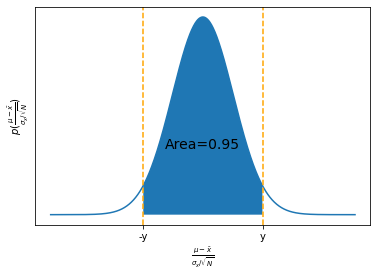

In [ ]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

#make some points for plot
N = 5
x = np.linspace(-N,N, 1000)
T = ss.norm.ppf(0.975)  #  percentil de la normal per una àrea de 0.975
y = ss.norm.pdf(x)      #  pdf de la normal en el rang x que hem definit
plt.plot(x,y)  
plt.fill_between(x, y, where= np.abs(x) < T)
plt.text(0,np.max(y) / 3, 'Area=0.95', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='orange')
plt.xticks([-T, T], ['-y', 'y'])
plt.yticks([])
plt.ylabel(r'$p(\frac{\mu - \bar{x}}{\sigma_x/\sqrt{N}})$')
plt.xlabel(r'$\frac{\mu - \bar{x}}{\sigma_x/\sqrt{N}}$')
plt.show()


Calculemos ahora el intervalo de confianza en torno a la media para una gausiana de una cierta media y desviación estándar.
Supongamos que después de tomar 30 muestras hemos encontrado que la media muestral es 45 y la desviación estándar es $\sigma_x = 3$. ¿Cuál es el intervalo en torno a $\mu$ para un nivel de confianza del 95%?

Como hemos visto antes:

$$P( \frac{- A}{\sigma_x / \sqrt{N}} < \frac{\mu - \bar{x}}{\sigma_x / \sqrt{N}}<  \frac{A}{\sigma_x / \sqrt{N}}) = 0.95$$

Nuestro intervalo irá de $2.5$ a $97.5$ (95% de probabilidad), así pues, tenemos que encontrar el valor $T$ para 
$[-\infty,2.5]$ i de $[97.5, \infty]$. 

In [ ]:
import scipy.stats

print(scipy.stats.norm.ppf(0.025))  # percentils de la normal
print(scipy.stats.norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


$$|T| = \frac{A}{\sigma_x / \sqrt{N}}$$

$$A = |T|\frac{\sigma_x}{\sqrt{N}}$$

In [ ]:
print(abs(scipy.stats.norm.ppf(0.025)) * 3 / np.sqrt(30))

1.0735164862302944


### <font color='orange'>**> Python #1**</font>


Tomamos 50 medidas y sabemos que el grosor de una pieza metálica sigue una distribución normal media muestral es 3.4 y la desviación estándar es $\sigma_x = 0.75$, construye el intervalo de confianza del 95% en torno a la media.


In [ ]:
import scipy.stats
import numpy as np


print(scipy.stats.norm.ppf(0.025))  # percentils de la normal
print(scipy.stats.norm.ppf(0.975))

print(abs(scipy.stats.norm.ppf(0.025)) * 0.75 / np.sqrt(50))

-1.9599639845400545
1.959963984540054
0.2078855736524517


Intervalos de confianza no centrados
===

A veces queremos poner límites únicamente en un lado del intervalo.

Intervalo superior (cota inferior)
--

Un intervalo superior comprende la parte superior x% de la densidad de probabilidad y se puede definir como un intervalo $(y,\infty)$, donde y es una cota inferior. A continuación se presenta el caso de un intervalo superior con un 90% de nivel de confianza.


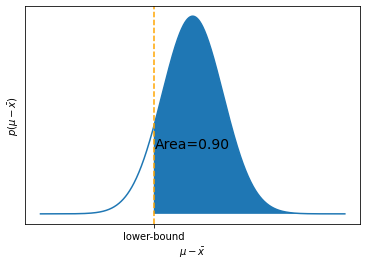

In [ ]:
#make some points for plot
N = 35
x = np.linspace(-5,5, 1000)
T = ss.norm.ppf(0.10)
y = ss.norm.pdf(x)
plt.plot(x,y)  
plt.fill_between(x, y, where= x > T)
plt.text(0,np.max(y) / 3, 'Area=0.90', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.xticks([T], ['lower-bound'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

Intervalo inferior (cota superior)
--

Un intervalo inferior comprende la parte inferior x% de la densidad de probabilidad y se puede definir como un intervalo $(-\infty,y)$, donde y es una cota superior. A continuación se presenta el caso de un intervalo inferior con un 90% de nivel de confianza.


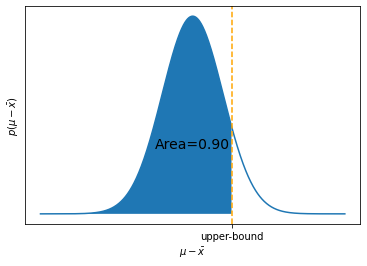

In [ ]:
#make some points for plot
N = 35
x = np.linspace(-5,5, 1000)
T = ss.norm.ppf(0.90)
y = ss.norm.pdf(x)
plt.plot(x,y)  
plt.fill_between(x, y, where= x < T)
plt.text(0,np.max(y) / 3, 'Area=0.90', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.xticks([T], ['upper-bound'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

Distribución de la media para N pequeño - t-Student
====

Para N < 25 la media de una población sigue la distribución t-Student. En los cálculos anteriores se tiene que sustituir la normal por la t-Student.

Ejemplo
====
Medimos el grosar de 6 piezas metálicas y encontramos $\bar{x} = 3.65$ y $\sigma_x = 1.25$. Construimos el intervalo de confianza que contiene 
 $\mu$ un 90% de las veces.


In [ ]:
#@title
N = 6
sample_mean = 3.65
sample_sigma = 1.25
CI = 0.9
Z = abs(scipy.stats.t.ppf((1 - CI) / 2,N-1))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {:3.3f}".format(Z))
print("mu = {} +/- {:3.2f}".format(sample_mean,y))


Z = 2.015
mu = 3.65 +/- 1.03


### <font color='orange'>**> Python #2**</font>

Para una muestra de 5 elementos, dibuja y construye el intervaloo
$(-\infty,y)$, donde y es una cota superior que incluye el 90% de la densidad de probabilidad de la distribución.


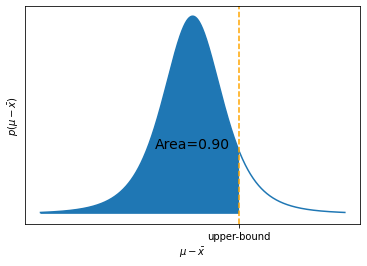

In [ ]:
#make some points for plot
N = 5
x = np.linspace(-5,5, 1000)
T = ss.t.ppf(0.90, df=N-1)
y = ss.t.pdf(x, df=N-1)
plt.plot(x,y)  
plt.fill_between(x, y, where= x < T)
plt.text(0,np.max(y) / 3, 'Area=0.90', fontdict={'size':14}, horizontalalignment='center')
plt.axvline(T, linestyle='--', color='orange')
plt.xticks([T], ['upper-bound'])
plt.yticks([])
plt.ylabel(r'$p(\mu - \bar{x})$')
plt.xlabel(r'$\mu - \bar{x}$')
plt.show()

### <font color='green'>**> ENTREGA**</font>

Exercici 1
====

Mesurem el gruix de 35 lloses i calculem $\bar{x} = 3.38$. Si sabem que $\sigma = 0.75$, construeix l'interval de confiança que conté la mitjana real $\mu$ amb 99.9% de confiança.


Sabem que $p(\bar{x} - \mu) \sim {\cal N}(0, \sigma / \sqrt{N})$. Volem trobar

$$ P(-A < \bar{x} - \mu < +A) = 0.999$$ **[4 punts]**

Resposta
--

In [ ]:
#@title
N = 25
sample_mean = 3.38
sample_sigma = 0.75
CI = 0.999
Z = abs(scipy.stats.norm.ppf((1 - CI) / 2))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {:3.3f}".format(Z))
print("mu = {} +/- {:.2f}".format(sample_mean,y))


Z = 3.291
mu = 3.38 +/- 0.49


Amb un nivell de confiança del 99.9%, $\mu$ es troba a $3.380 \pm 0.417$.


Com abans $p(\bar{x} - \mu) \sim {\cal N}(0, \sigma / \sqrt{N})$. Volem

$$ P(-y < \bar{x} - \mu < +y) = 0.999$$

Exercici 2
====

Mesurem el gruix de 25 lloses de metall i trobem $\bar{x} = 3.42$ i $\sigma_x = 0.85$. Construeix l'interval de confiança per $\mu$ amb un nivell de confiança del 90%. **[3 punts]**


Resposta
--

In [ ]:
#@title
N = 25
sample_mean = 3.42
sample_sigma = 0.85
CI = 0.9
Z = abs(scipy.stats.norm.ppf((1 - CI) / 2))
y = Z*sample_sigma/np.sqrt(N)
print("Z = {:3.3f}".format(Z))
print("mu = {} +/- {:3.2f}".format(sample_mean,y))


Z = 1.645
mu = 3.42 +/- 0.28


Exercici 3
===

Prenem una mostra de mida $N = 100$ i trobem $\bar{x} = 50$ i $\sigma_x = 10$. Calcula l'interval superior de confiança per $\mu$ amb un nivell del 95%. **[3 punts]**

Resposta
--

Volem $$P(-y < \bar{x} - \mu < \infty) = 0.95$$

Sabem que la probabilitat segueix $\cal{N}(0,\sigma_x/\sqrt{N})$

In [ ]:
CI = 0.95
Z = scipy.stats.norm.ppf((1 - CI))
y = -Z*10/np.sqrt(100)
print("Z = {:3.3f}".format(-Z))
print("y = {:3.3f}".format(y))
print("{:3.2f}".format(50 - y))

Z = 1.645
y = 1.645
48.36


$$ y = \frac{10}{\sqrt{100}} 1.645 = 1.645$$

$\mu \in (48.36,\infty)$ amb un 95% de confiança.